### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [3]:
data = pd.read_csv('data/coupons.csv')

In [4]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [ ]:
# First lets familiarize ourselves with dataframe content 
# There is 12684 entries but with some missing data
data.info()

In [6]:
# Now lets investigate and quantify the dataset for missing data
data.isnull().sum()

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

3. Decide what to do about your missing data -- drop, replace, other...

In [7]:
# From above data, it seems like few categorical columns have missing data with the "car" column having the most.  
# Other columns that have small number of missing data can be filled with criteria that depends on how critical the data is and its statistical distribution
# Before doing anythng, lets check the unique values of each categorical column

for col in data.select_dtypes(include='object').columns:
   print(f"Unique values in '{col}': {data[col].unique()}")

Unique values in 'destination': ['No Urgent Place' 'Home' 'Work']
Unique values in 'passanger': ['Alone' 'Friend(s)' 'Kid(s)' 'Partner']
Unique values in 'weather': ['Sunny' 'Rainy' 'Snowy']
Unique values in 'time': ['2PM' '10AM' '6PM' '7AM' '10PM']
Unique values in 'coupon': ['Restaurant(<20)' 'Coffee House' 'Carry out & Take away' 'Bar'
 'Restaurant(20-50)']
Unique values in 'expiration': ['1d' '2h']
Unique values in 'gender': ['Female' 'Male']
Unique values in 'age': ['21' '46' '26' '31' '41' '50plus' '36' 'below21']
Unique values in 'maritalStatus': ['Unmarried partner' 'Single' 'Married partner' 'Divorced' 'Widowed']
Unique values in 'education': ['Some college - no degree' 'Bachelors degree' 'Associates degree'
 'High School Graduate' 'Graduate degree (Masters or Doctorate)'
 'Some High School']
Unique values in 'occupation': ['Unemployed' 'Architecture & Engineering' 'Student'
 'Education&Training&Library' 'Healthcare Support'
 'Healthcare Practitioners & Technical' 'Sales & Rel

In [ ]:
# Its clear from above info that there isn't many cars variaty but only Mazda5 and crossover
# Therefore, its more beneficial to drop the "car' column.
# We will also populate any missing data in other columns with "0", False, "never", ..etc, since the data is already rich and only small portion of it is missing.
data = data.drop(columns=['car']) 
data['Bar']= data['Bar'].fillna('never')
data['CoffeeHouse'] = data['CoffeeHouse'].fillna('never')
data['CarryAway'] = data['CarryAway'].fillna('never')
data['RestaurantLessThan20'] = data['RestaurantLessThan20'].fillna('never')
data['Restaurant20To50'] = data['Restaurant20To50'].fillna('never')
data.isnull().sum()      # Check no missing data

4. What proportion of the total observations chose to accept the coupon?



In [9]:
# Here we count the number of "1" in the Y column and divide by the total number of coupons
Prop_accepted = data[data['Y']==1].shape[0]/data['Y'].shape[0]
print(f"Proportion of the total observations chose to accept the coupon: {Prop_accepted:0.5f}")
print(f"Proportion of the total observations chose to accept the coupon: {Prop_accepted*100:0.3f}%")

Proportion of the total observations chose to accept the coupon: 0.56843
Proportion of the total observations chose to accept the coupon: 56.843%


In [14]:
# Alternatively, we can use the mean() method that gives the same answer
Prop_accepted_2 = data['Y'].mean()
print(f"Proportion of bar coupons were accepted: {Prop_accepted_2:0.5f}")
print(f"Proportion of bar coupons were accepted: {Prop_accepted_2*100:0.3f}%")

Proportion of bar coupons were accepted: 0.56843
Proportion of bar coupons were accepted: 56.843%


5. Use a bar plot to visualize the `coupon` column.

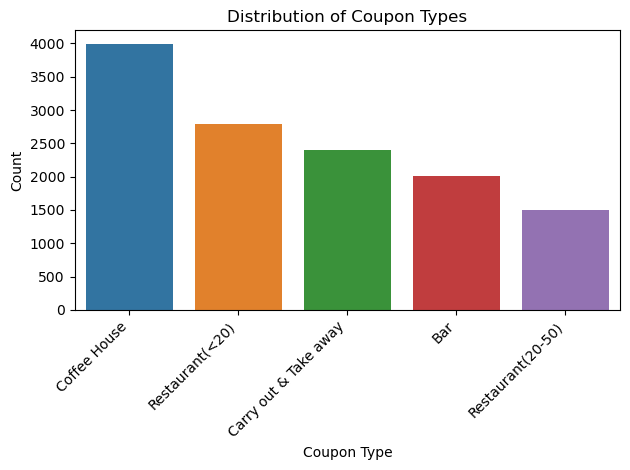

In [15]:
# Here we can count the total number of coupons for each coupon type and use the seaborn barplot
# Its clear that the Coffee House coupons dominate and have the largest number of coupons, followed by cheap restaurants, then take away, then bars, and finally more expensive restaurants.
Coupons = data['coupon'].value_counts()             
sns.barplot(x=Coupons.index, y=Coupons.values)
plt.title('Distribution of Coupon Types')
plt.xlabel('Coupon Type')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

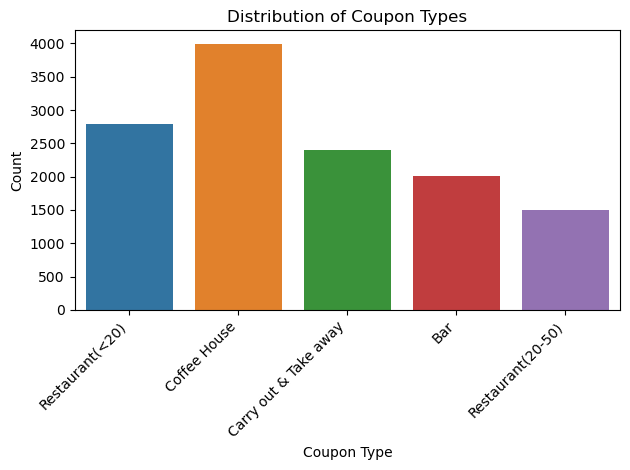

In [12]:
# Alternatively we can use seaborn countplot command to do the same job in less lines of code
sns.countplot(data=data, x='coupon')
plt.title('Distribution of Coupon Types')
plt.xlabel('Coupon Type')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

6. Use a histogram to visualize the temperature column.

/opt/conda/envs/anaconda-ai-2024.04-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


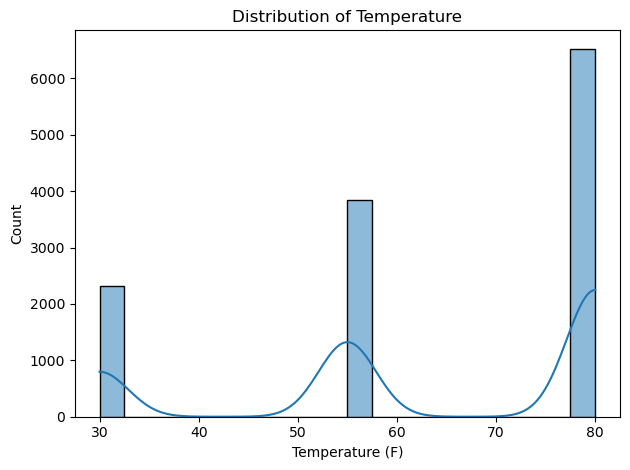

In [20]:
# Used histplot to plot the temperature histogram, also enabled kde
# The plot shows higher number of coupon distribution as temperature increases
sns.histplot(data=data, x='temperature', bins=20, kde=True) 
plt.title('Distribution of Temperature')
plt.xlabel('Temperature (F)')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [22]:
bar_coupons=data[data['coupon']=='Bar']      # Filter and assign data for Bar coupons only
bar_coupons.info()                           # Explore data structure
bar_coupons.isnull().sum()                   # Check for any missing values

<class 'pandas.core.frame.DataFrame'>
Index: 2017 entries, 9 to 12682
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           2017 non-null   object
 1   passanger             2017 non-null   object
 2   weather               2017 non-null   object
 3   temperature           2017 non-null   int64 
 4   time                  2017 non-null   object
 5   coupon                2017 non-null   object
 6   expiration            2017 non-null   object
 7   gender                2017 non-null   object
 8   age                   2017 non-null   object
 9   maritalStatus         2017 non-null   object
 10  has_children          2017 non-null   int64 
 11  education             2017 non-null   object
 12  occupation            2017 non-null   object
 13  income                2017 non-null   object
 14  Bar                   2017 non-null   object
 15  CoffeeHouse           2017 non-null   obje

destination             0
passanger               0
weather                 0
temperature             0
time                    0
coupon                  0
expiration              0
gender                  0
age                     0
maritalStatus           0
has_children            0
education               0
occupation              0
income                  0
Bar                     0
CoffeeHouse             0
CarryAway               0
RestaurantLessThan20    0
Restaurant20To50        0
toCoupon_GEQ5min        0
toCoupon_GEQ15min       0
toCoupon_GEQ25min       0
direction_same          0
direction_opp           0
Y                       0
dtype: int64

2. What proportion of bar coupons were accepted?


In [23]:
# Here we count the number of "1" in the Y column and divide by the total number of coupons
Prop_bar_coupons_accepted = bar_coupons[bar_coupons['Y']==1].shape[0]/bar_coupons['Y'].shape[0]
print(f"Proportion of bar coupons were accepted: {Prop_bar_coupons_accepted:0.5f}")
print(f"Proportion of bar coupons were accepted: {Prop_bar_coupons_accepted*100:0.3f}%")

Proportion of bar coupons were accepted: 0.41001
Proportion of bar coupons were accepted: 41.001%


In [24]:
# Alternatively, we can use the mean() method that gives the same answer
Prop_bar_coupons_accepted2 = bar_coupons['Y'].mean()
print(f"Proportion of bar coupons were accepted: {Prop_bar_coupons_accepted2:0.5f}")
print(f"Proportion of bar coupons were accepted: {Prop_bar_coupons_accepted2*100:0.3f}%")

Proportion of bar coupons were accepted: 0.41001
Proportion of bar coupons were accepted: 41.001%


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [25]:
# Lets examine the content of the "Bar" column
bar_coupons['Bar'].unique()

array(['never', 'less1', '1~3', 'gt8', '4~8'], dtype=object)

Acceptance rate for those who went to a bar 3 or fewer times a month: 37.074%
Acceptance rate for those who went to a bar more than 3 times a month: 76.884%


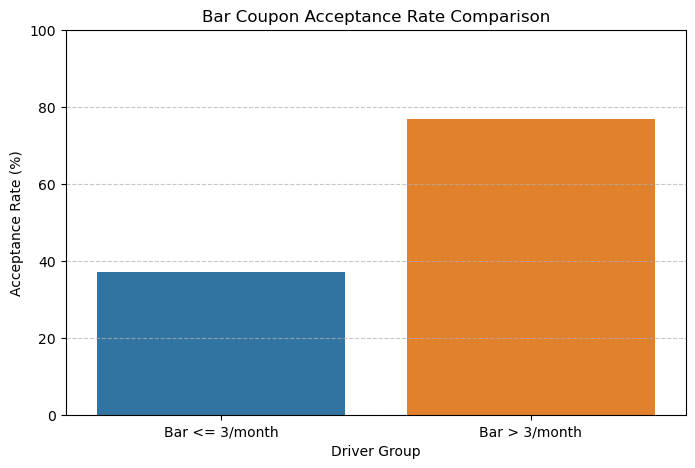

In [106]:
# Now lets calculate the acceptance rate for each group
bar_3_or_fewer = bar_coupons[bar_coupons['Bar'].isin(['never', 'less1', '1~3'])]
bar_more_than_3 = bar_coupons[bar_coupons['Bar'].isin(['gt8', '4~8'])]
bar_3_or_fewer_acceptance_rate = bar_3_or_fewer['Y'].mean()
bar_more_than_3_acceptance_rate = bar_more_than_3['Y'].mean()
print(f"Acceptance rate for those who went to a bar 3 or fewer times a month: {bar_3_or_fewer_acceptance_rate*100:0.3f}%")
print(f"Acceptance rate for those who went to a bar more than 3 times a month: {bar_more_than_3_acceptance_rate*100:0.3f}%")

# Lets create a new dataframe for plotting
comparison_data = pd.DataFrame({
    'Group': ['Bar <= 3/month', 'Bar > 3/month'],
    'Acceptance Rate': [bar_3_or_fewer_acceptance_rate*100, bar_more_than_3_acceptance_rate*100]
})

plt.figure(figsize=(8, 5))
sns.barplot(data=comparison_data, x='Group', y='Acceptance Rate')
plt.title('Bar Coupon Acceptance Rate Comparison')
plt.xlabel('Driver Group')
plt.ylabel('Acceptance Rate (%)')
plt.ylim(0, 100)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Below data show clearly that people who goes to the bar more than 3 times a week, have significantly higher coupon acceptance rate

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [107]:
# Lets examine the content of the "age" column
bar_coupons['age'].unique()

array(['21', '46', '26', '31', '41', '50plus', '36', 'below21'],
      dtype=object)

Acceptance rate for drivers who go to a bar more than once a month and are over the age of 25: 69.524%
Acceptance rate for all other drivers: 33.500%
The difference in acceptance rate between the two groups is: 36.023%


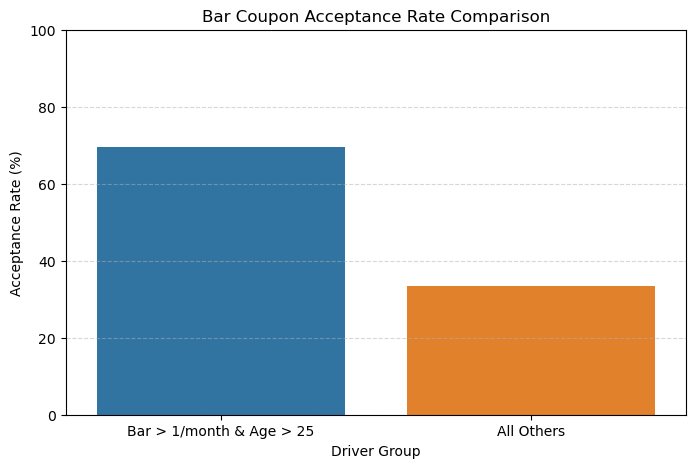

In [108]:
list_bar_more_than_once = ['1~3', '4~8', 'gt8']                # Make a list of people who goes to bar more than once a month
list_age_over_25 = ['26', '31', '36', '41', '46', '50plus']    # Make a list of people with age over 25
wanted_drivers = bar_coupons[                                  # Create a dataframe for these group of people
    (bar_coupons['Bar'].isin(list_bar_more_than_once)) &
    (bar_coupons['age'].isin(list_age_over_25))]
wanted_drivers_acceptance_rate = wanted_drivers['Y'].mean()    # Calculate acceptance rate for drivers who go to a bar more than once a month and are over the age of 25
other_drivers = bar_coupons.drop(wanted_drivers.index)         # All other drivers
other_drivers_acceptance_rate = other_drivers['Y'].mean()      # Calculate acceptance rate for all other drivers 
difference = wanted_drivers_acceptance_rate - other_drivers_acceptance_rate   # Calculate the difference between these two groups
print(f"Acceptance rate for drivers who go to a bar more than once a month and are over the age of 25: {wanted_drivers_acceptance_rate*100:0.3f}%")
print(f"Acceptance rate for all other drivers: {other_drivers_acceptance_rate*100:0.3f}%")
print(f"The difference in acceptance rate between the two groups is: {difference*100:0.3f}%")

# Lets create a new dataframe for plotting
comparison_data = pd.DataFrame({
    'Group': ['Bar > 1/month & Age > 25', 'All Others'],
    'Acceptance Rate': [wanted_drivers_acceptance_rate*100, other_drivers_acceptance_rate*100]
})

plt.figure(figsize=(8, 5))
sns.barplot(data=comparison_data, x='Group', y='Acceptance Rate')
plt.title('Bar Coupon Acceptance Rate Comparison')
plt.xlabel('Driver Group')
plt.ylabel('Acceptance Rate (%)')
plt.ylim(0, 100)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

# Below data still suggests that people who goes to bar more than once a month have significant acceptance rate, while age does impact this rate slightly

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


In [109]:
# Lets examine the content of the "passenger" column
bar_coupons['passanger'].unique()

array(['Kid(s)', 'Alone', 'Friend(s)', 'Partner'], dtype=object)

In [110]:
# Lets examine the content of the occupation" column
bar_coupons['occupation'].unique()

array(['Unemployed', 'Architecture & Engineering', 'Student',
       'Education&Training&Library', 'Healthcare Support',
       'Healthcare Practitioners & Technical', 'Sales & Related',
       'Management', 'Arts Design Entertainment Sports & Media',
       'Computer & Mathematical', 'Life Physical Social Science',
       'Personal Care & Service', 'Community & Social Services',
       'Office & Administrative Support', 'Construction & Extraction',
       'Legal', 'Retired', 'Installation Maintenance & Repair',
       'Transportation & Material Moving', 'Business & Financial',
       'Protective Service', 'Food Preparation & Serving Related',
       'Production Occupations',
       'Building & Grounds Cleaning & Maintenance',
       'Farming Fishing & Forestry'], dtype=object)

Acceptance rate for drivers who go to a bar more than once a month, with no kids and not in farming, fishing, or forestry occupation: 68.792%
Acceptance rate for all other drivers: 29.346%
The difference in acceptance rate between the two groups is: 39.446%


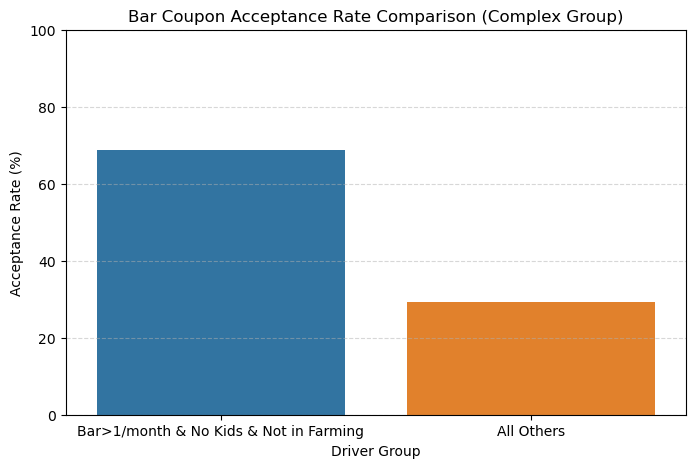

In [111]:
list_bar_more_than_once = ['1~3', '4~8', 'gt8']              # Make a list of people who goes to bar more than once a month
list_passenger_kid = ['kid(s)']                              # Make a list of passenger is kid
list_occupation = ['Farming Fishing & Forestry']             # Make a list of occupation: farming, fishing, or forestry  
wanted_drivers = bar_coupons[
    (bar_coupons['Bar'].isin(list_bar_more_than_once)) &     # Filter those who goes to bar more than once a month
    (~bar_coupons['passanger'].isin(list_passenger_kid)) &   # Filter passenger isn't kid(s)
    (~bar_coupons['occupation'].isin(list_occupation))]      # Filter occupation other than farming, fishing, or forestry 
wanted_drivers_acceptance_rate = wanted_drivers['Y'].mean()  # Calculate acceptance rate for drivers who go to a bar more than once a month with no kid(s) and don't work in farming, fishing, or forestry  
other_drivers = bar_coupons.drop(wanted_drivers.index)       # All other drivers
other_drivers_acceptance_rate = other_drivers['Y'].mean()    # Calculate acceptance rate for all other drivers 
difference = wanted_drivers_acceptance_rate - other_drivers_acceptance_rate
print(f"Acceptance rate for drivers who go to a bar more than once a month, with no kids and not in farming, fishing, or forestry occupation: {wanted_drivers_acceptance_rate*100:0.3f}%")
print(f"Acceptance rate for all other drivers: {other_drivers_acceptance_rate*100:0.3f}%")
print(f"The difference in acceptance rate between the two groups is: {difference*100:0.3f}%")
# Lets create a new dataframe for plotting
comparison_data_complex = pd.DataFrame({
    'Group': ['Bar>1/month & No Kids & Not in Farming', 'All Others'],
    'Acceptance Rate': [wanted_drivers_acceptance_rate*100, other_drivers_acceptance_rate*100]
})

plt.figure(figsize=(8, 5))
sns.barplot(data=comparison_data_complex, x='Group', y='Acceptance Rate')
plt.title('Bar Coupon Acceptance Rate Comparison (Complex Group)')
plt.xlabel('Driver Group')
plt.ylabel('Acceptance Rate (%)')
plt.ylim(0, 100)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

# Below data still suggests that people who goes to bar more than once a month have significant acceptance rate, while other factors impact this rate slightly

6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



In [112]:
# Compare the acceptance rates between those drivers who go to bars more than once a month, had passengers that were not a kid, and were not widowed
# Lets examine the content of the "maritalStatus" column
bar_coupons['maritalStatus'].unique()

array(['Unmarried partner', 'Single', 'Married partner', 'Divorced',
       'Widowed'], dtype=object)

Acceptance rate for drivers who go to a bar more than once a month, have no kids and are not widowed: 68.792%
Acceptance rate for all other drivers: 29.346%
The difference in acceptance rate between the two groups is: 39.446%


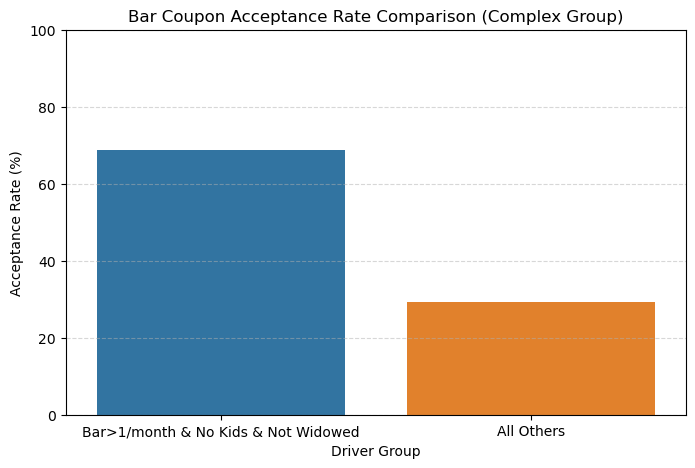

In [113]:
list_bar_more_than_once = ['1~3', '4~8', 'gt8']              # Make a list of people who goes to bar more than once a month
list_passenger_kid = ['kid(s)']                              # Make a list of passenger is kid
list_maritalStatus = ['Widowed']                             # Make a list of marital status is Widowed  
wanted_drivers = bar_coupons[
    (bar_coupons['Bar'].isin(list_bar_more_than_once)) &     # Filter those who goes to bar more than once a month
    (~bar_coupons['passanger'].isin(list_passenger_kid)) &   # Filter passenger isn't kid(s)
    (~bar_coupons['maritalStatus'].isin(list_maritalStatus))]# Filter marital status isn't Widowed
wanted_drivers_acceptance_rate = wanted_drivers['Y'].mean()  # Acceptance rate for drivers who go to a bar more than once a month with no kid(s) and not widowed  
other_drivers = bar_coupons.drop(wanted_drivers.index)       # All other drivers
other_drivers_acceptance_rate = other_drivers['Y'].mean()    # Acceptance rate for all other drivers 
difference = wanted_drivers_acceptance_rate - other_drivers_acceptance_rate
print(f"Acceptance rate for drivers who go to a bar more than once a month, have no kids and are not widowed: {wanted_drivers_acceptance_rate*100:0.3f}%")
print(f"Acceptance rate for all other drivers: {other_drivers_acceptance_rate*100:0.3f}%")
print(f"The difference in acceptance rate between the two groups is: {difference*100:0.3f}%")
# Lets create a new dataframe for plotting
comparison_data_complex = pd.DataFrame({
    'Group': ['Bar>1/month & No Kids & Not Widowed', 'All Others'],
    'Acceptance Rate': [wanted_drivers_acceptance_rate*100, other_drivers_acceptance_rate*100]
})

plt.figure(figsize=(8, 5))
sns.barplot(data=comparison_data_complex, x='Group', y='Acceptance Rate')
plt.title('Bar Coupon Acceptance Rate Comparison (Complex Group)')
plt.xlabel('Driver Group')
plt.ylabel('Acceptance Rate (%)')
plt.ylim(0, 100)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

# Again, below data still suggests that people who goes to bar more than once a month have significant acceptance rate, while other factors impact this rate slightly

Acceptance rate for drivers who go to a bar more than once a month and are under the age of 30: 72.174%
Acceptance rate for all other drivers: 34.569%
The difference in acceptance rate between the two groups is: 37.605%


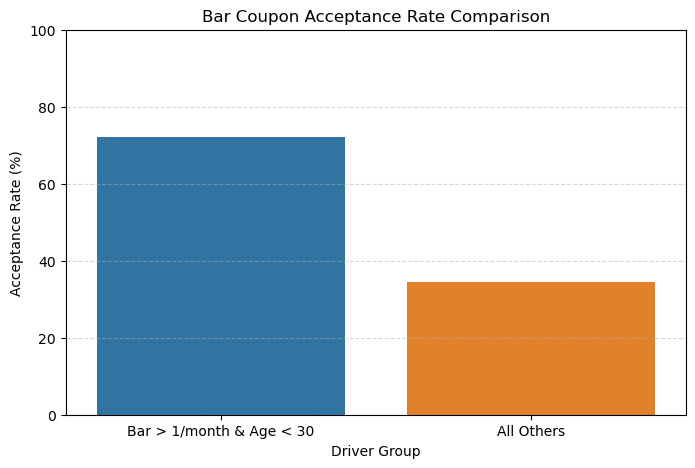

In [119]:
# Compare the acceptance rates between those drivers who go to bars more than once a month and are under the age of 30
list_bar_more_than_once = ['1~3', '4~8', 'gt8']                # Make a list of people who goes to bar more than once a month
list_age_over_30 = ['31', '36', '41', '46', '50plus']          # Make a list of people aged 30 or over
wanted_drivers = bar_coupons[
    (bar_coupons['Bar'].isin(list_bar_more_than_once)) &       # Filter those who goes to bar more than once a month
    (~bar_coupons['age'].isin(list_age_over_30))]              # Filter those with age under 30
wanted_drivers_acceptance_rate = wanted_drivers['Y'].mean()    # Acceptance rate for drivers who go to a bar more than once a month and under the age of 30
other_drivers = bar_coupons.drop(wanted_drivers.index)         # All other drivers
other_drivers_acceptance_rate = other_drivers['Y'].mean()      # Acceptance rate for all other drivers 
difference = wanted_drivers_acceptance_rate - other_drivers_acceptance_rate
print(f"Acceptance rate for drivers who go to a bar more than once a month and are under the age of 30: {wanted_drivers_acceptance_rate*100:0.3f}%")
print(f"Acceptance rate for all other drivers: {other_drivers_acceptance_rate*100:0.3f}%")
print(f"The difference in acceptance rate between the two groups is: {difference*100:0.3f}%")

# Lets create a new dataframe for plotting
comparison_data = pd.DataFrame({
    'Group': ['Bar > 1/month & Age < 30', 'All Others'],
    'Acceptance Rate': [wanted_drivers_acceptance_rate*100, other_drivers_acceptance_rate*100]
})

plt.figure(figsize=(8, 5))
sns.barplot(data=comparison_data, x='Group', y='Acceptance Rate')
plt.title('Bar Coupon Acceptance Rate Comparison')
plt.xlabel('Driver Group')
plt.ylabel('Acceptance Rate (%)')
plt.ylim(0, 100)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

# Again, below data still suggests that people who goes to bar more than once a month have significant acceptance rate, while other factors impact this rate slightly

In [115]:
# Compare the acceptance rates between those drivers who go to cheap restaurants more than 4 times a month and income is less than 50K
# Lets examine the content of the "RestaurantLessThan20" column
bar_coupons['RestaurantLessThan20'].unique()

array(['4~8', '1~3', 'less1', 'gt8', 'never'], dtype=object)

In [116]:
# Lets examine the content of the "income" column
bar_coupons['income'].unique()

array(['$37500 - $49999', '$62500 - $74999', '$12500 - $24999',
       '$75000 - $87499', '$50000 - $62499', '$25000 - $37499',
       '$100000 or More', '$87500 - $99999', 'Less than $12500'],
      dtype=object)

Acceptance rate for drivers who go to a cheap restaurants more than 4 times a month and income less than 50k: 78.704%
Acceptance rate for all other drivers: 38.869%
The difference in acceptance rate between the two groups is: 39.835%


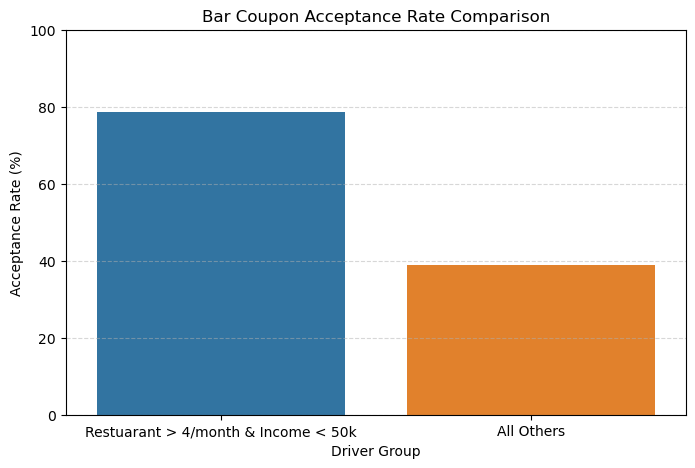

In [122]:
list_rest_more_than_4 = ['4~8', 'gt8']                         # Make a list of people who goes to cheap restaurant more than 4 times a month
list_income_below_50k = ['$37500 - $49999', '$12500 - $24999', '$25000 - $37499', 'Less than $12500']     # Make a list of people with income less than 50k
wanted_drivers = bar_coupons[
    (bar_coupons['Bar'].isin(list_rest_more_than_4)) &         # Filter those who goes to restaurants more than 4 times a month
    (bar_coupons['income'].isin(list_income_below_50k))]       # Filter those with income under 50k
wanted_drivers_acceptance_rate = wanted_drivers['Y'].mean()    # Acceptance rate for drivers who go to cheap restaurant more than 4 times a month and make less than 50k income
other_drivers = bar_coupons.drop(wanted_drivers.index)         # All other drivers
other_drivers_acceptance_rate = other_drivers['Y'].mean()      # Acceptance rate for all other drivers 
difference = wanted_drivers_acceptance_rate - other_drivers_acceptance_rate
print(f"Acceptance rate for drivers who go to a cheap restaurants more than 4 times a month and income less than 50k: {wanted_drivers_acceptance_rate*100:0.3f}%")
print(f"Acceptance rate for all other drivers: {other_drivers_acceptance_rate*100:0.3f}%")
print(f"The difference in acceptance rate between the two groups is: {difference*100:0.3f}%")

# Lets create a new dataframe for plotting
comparison_data = pd.DataFrame({
    'Group': ['Restuarant > 4/month & Income < 50k', 'All Others'],
    'Acceptance Rate': [wanted_drivers_acceptance_rate*100, other_drivers_acceptance_rate*100]
})

plt.figure(figsize=(8, 5))
sns.barplot(data=comparison_data, x='Group', y='Acceptance Rate')
plt.title('Bar Coupon Acceptance Rate Comparison')
plt.xlabel('Driver Group')
plt.ylabel('Acceptance Rate (%)')
plt.ylim(0, 100)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

# Below data suggests that people who goes to restaurants more than 4 times a month and earn less than 50k have significant acceptance rate of 78.74%

7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

From above data, it is clear that people who visits bars more than once a week have significant coupon acceptance rate; Within this group, people who visits bars more than 3 times a week have much higher acceptance rate than people who visits bars 3 times a week or less. Data also suggests that people who visits cheap restaurants 4 or more times a week are the people who mostly accepted the bar coupons.  
The above conclusion seems intuitive and make sense, people who likes to drink and eat outside quite often would welcome these coupons. Whether these results would be good or bad for the society, its subject for debate!

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  